In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
sns.set()

In [2]:
df = pd.read_csv("data/titanic.csv")
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


<AxesSubplot:>

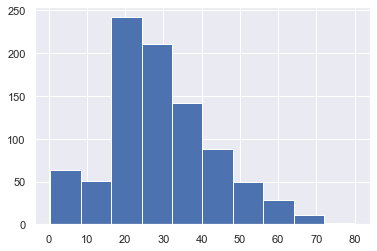

In [3]:
df.Age.hist()

In [4]:
df.Age.corr(df.Survived)

-0.05966512633025011

In [5]:
df["age_group"]= pd.qcut(df.Age,q =10)

In [6]:
df.age_group.value_counts()

(14.8, 19.0]     110
(24.0, 28.0]     109
(19.0, 22.0]      97
(40.4, 49.0]      96
(0.419, 14.8]     89
(35.0, 40.4]      84
(49.0, 80.0]      82
(28.0, 31.0]      81
(31.0, 35.0]      79
(22.0, 24.0]      60
Name: age_group, dtype: int64

In [7]:
df.groupby("age_group").Survived.value_counts()

age_group      Survived
(0.419, 14.8]  1           48
               0           41
(14.8, 19.0]   0           69
               1           41
(19.0, 22.0]   0           72
               1           25
(22.0, 24.0]   0           35
               1           25
(24.0, 28.0]   0           72
               1           37
(28.0, 31.0]   0           50
               1           31
(31.0, 35.0]   0           41
               1           38
(35.0, 40.4]   0           52
               1           32
(40.4, 49.0]   0           58
               1           38
(49.0, 80.0]   0           55
               1           27
Name: Survived, dtype: int64

In [8]:
df.groupby("age_group").Survived.value_counts(normalize = True)

age_group      Survived
(0.419, 14.8]  1           0.539326
               0           0.460674
(14.8, 19.0]   0           0.627273
               1           0.372727
(19.0, 22.0]   0           0.742268
               1           0.257732
(22.0, 24.0]   0           0.583333
               1           0.416667
(24.0, 28.0]   0           0.660550
               1           0.339450
(28.0, 31.0]   0           0.617284
               1           0.382716
(31.0, 35.0]   0           0.518987
               1           0.481013
(35.0, 40.4]   0           0.619048
               1           0.380952
(40.4, 49.0]   0           0.604167
               1           0.395833
(49.0, 80.0]   0           0.670732
               1           0.329268
Name: Survived, dtype: float64

In [13]:
ages = np.arange(0,df.Age.max(),10)

In [14]:
def age_group(x):
    for a,aa in zip(ages[:-1],ages[1:]):
        if a  < x and x  < aa:
            return (a,aa)
    return (aa, None)

In [16]:
df.Age.apply(age_group).value_counts()

(20.0, 30.0)    270
(30.0, 40.0)    166
(10.0, 20.0)    126
(70.0, None)     98
(40.0, 50.0)     96
(0.0, 10.0)      71
(50.0, 60.0)     41
(60.0, 70.0)     19
Name: Age, dtype: int64

In [17]:
df["age_group"] = df.Age.apply(age_group) 

In [18]:
df.groupby("age_group").Survived.value_counts(normalize= True)

age_group     Survived
(0.0, 10.0)   1           0.577465
              0           0.422535
(10.0, 20.0)  0           0.619048
              1           0.380952
(20.0, 30.0)  0           0.651852
              1           0.348148
(30.0, 40.0)  0           0.560241
              1           0.439759
(40.0, 50.0)  0           0.604167
              1           0.395833
(50.0, 60.0)  0           0.634146
              1           0.365854
(60.0, 70.0)  0           0.789474
              1           0.210526
(70.0, None)  0           0.704082
              1           0.295918
Name: Survived, dtype: float64

In [21]:
rdf = df.groupby("age_group").Survived.value_counts(normalize= True).rename("rate").reset_index()
rdf["lage"]= rdf.age_group.apply(lambda x: x[0])
rdf["rage"] = rdf.age_group.apply(lambda x: x[1])
rdf

,age_group,Survived,rate,lage,rage
0,"(0.0, 10.0)",1,0.577465,0.0,10.0
1,"(0.0, 10.0)",0,0.422535,0.0,10.0
2,"(10.0, 20.0)",0,0.619048,10.0,20.0
3,"(10.0, 20.0)",1,0.380952,10.0,20.0
4,"(20.0, 30.0)",0,0.651852,20.0,30.0
5,"(20.0, 30.0)",1,0.348148,20.0,30.0
6,"(30.0, 40.0)",0,0.560241,30.0,40.0
7,"(30.0, 40.0)",1,0.439759,30.0,40.0
8,"(40.0, 50.0)",0,0.604167,40.0,50.0
9,"(40.0, 50.0)",1,0.395833,40.0,50.0
